# <font color ='red'>FRAMINGHAM HEART DISEASE PREDICTION</font>

#   <font color ='black'>NAME:</font><font color ='red'> RASA AJAY CHANDRA</font>

# <font color ='black'>REG:</font><font color ='red'> 12018872</font>

## PROBLEM STATEMENT 

The "Framingham" heart disease dataset includes over 4,240 records,16 columns and 15 attributes.
The goal of the dataset is to predict whether the patient has 10-year risk of future (CHD) coronary heart disease

# Importing libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np       #  linear algebra
import pandas as pd     # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt 

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Reading the dataset

In [3]:
df = pd.read_csv('framingham.csv')

In [11]:
df.head() # First Five rows of dataset

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
df.tail()   # First Five rows of dataset

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [13]:
df.shape # (rows,columns)

(4240, 16)

In [14]:
df.info() # Data Types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [15]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [16]:
df.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Data Cleaning 

In [17]:
# checking if there is null values or not
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [18]:
# From the above result there are some NAN Values in the atttributes . so we will just drop that varibales.

In [19]:
# Dropping all rows with missing data

df = df.dropna()
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [20]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# Lets Check for duplicates values 

In [21]:
# checking duplicates for row 

In [22]:
df.duplicated().sum()

0

In [23]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4233    False
4234    False
4237    False
4238    False
4239    False
Length: 3658, dtype: bool

##  DATA VISUALIZATION

In [4]:
# Pie plot 

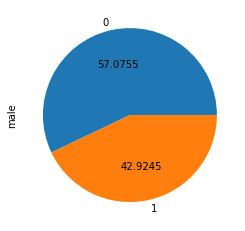

In [7]:
df['male'].value_counts().plot(kind="pie", autopct="%.4f")
plt.show()

In [ ]:
# 1 indicates male and 0 indicates female

In [ ]:
#  From the above pie plot there are 43% of males and 57% of females

In [9]:
# Histogram

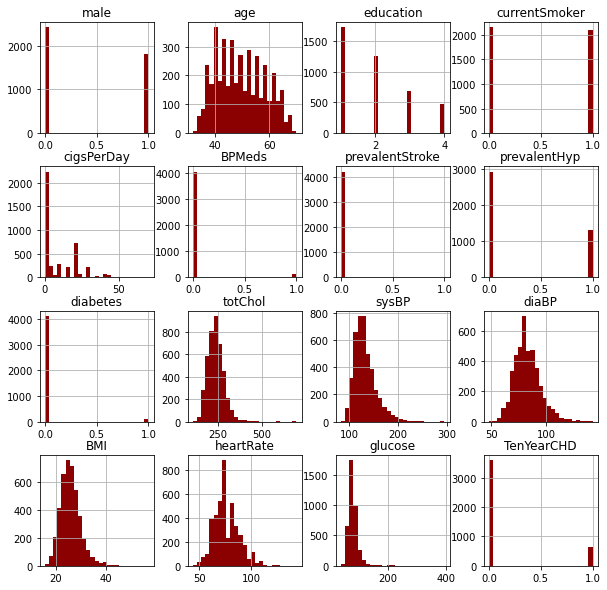

In [8]:
df.hist(bins=25,figsize=(10,10),color='darkred')
plt.show()

array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

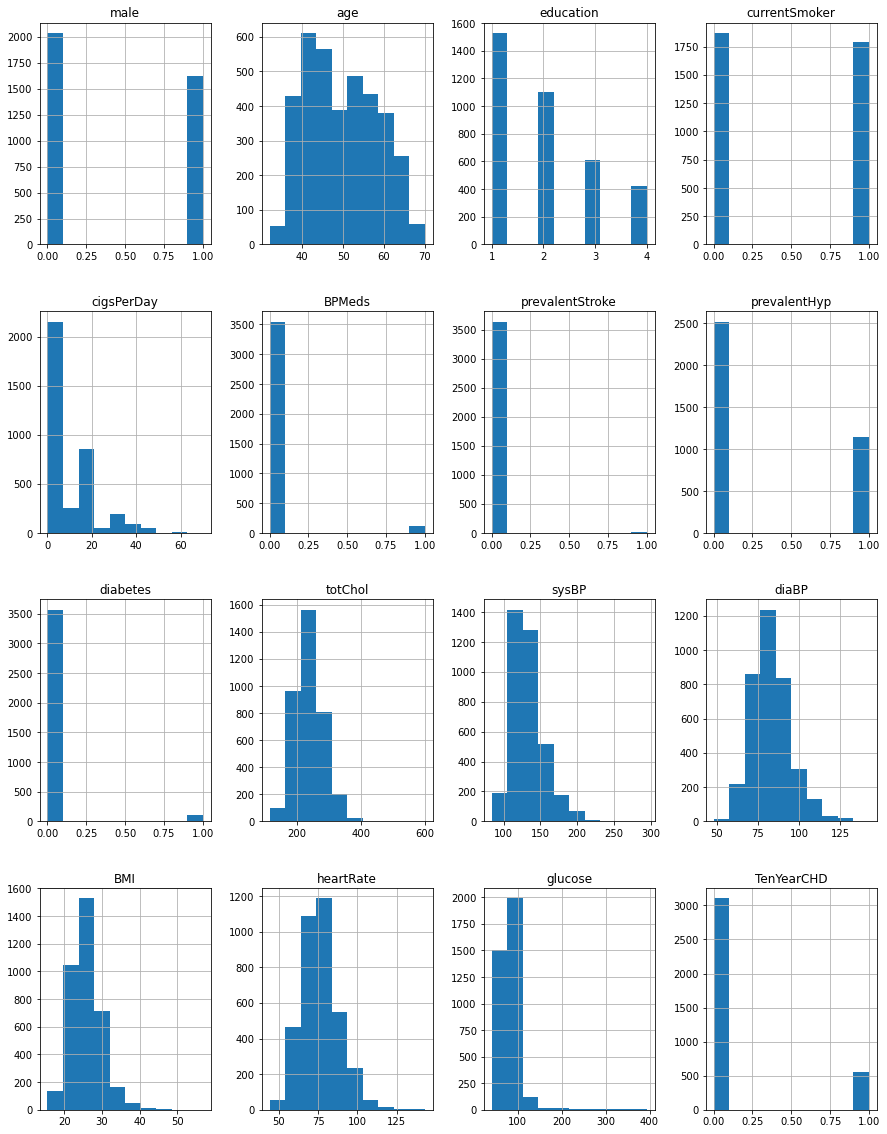

In [24]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

###  Cheking for the correlation between the variables

In [25]:
df_corr = df.corr(method='pearson')
df_corr

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024412,0.017729,0.206114,0.330322,-0.052124,-0.002312,0.001424,0.013819,-0.070321,-0.045358,0.051872,0.073111,-0.115285,0.002940,0.091688
age,-0.024412,1.000000,-0.159499,-0.210771,-0.189295,0.134732,0.050893,0.306239,0.109092,0.268252,0.388267,0.208283,0.137511,-0.002722,0.118349,0.233983
education,0.017729,-0.159499,1.000000,0.025251,0.013790,-0.013739,-0.030386,-0.078828,-0.039627,-0.013522,-0.124360,-0.058059,-0.137555,-0.064214,-0.031998,-0.063279
currentSmoker,0.206114,-0.210771,0.025251,1.000000,0.773913,-0.051923,-0.038150,-0.108078,-0.041849,-0.051034,-0.134428,-0.115955,-0.159821,0.050841,-0.053242,0.019165
cigsPerDay,0.330322,-0.189295,0.013790,0.773913,1.000000,-0.046504,-0.036286,-0.070460,-0.036961,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.053726,0.052014
BPMeds,-0.052124,0.134732,-0.013739,-0.051923,-0.046504,1.000000,0.113125,0.262910,0.049066,0.094083,0.271263,0.199630,0.105642,0.012889,0.054232,0.089152
prevalentStroke,-0.002312,0.050893,-0.030386,-0.038150,-0.036286,0.113125,1.000000,0.066057,0.009625,0.012736,0.061070,0.055834,0.036496,-0.017019,0.016061,0.048366
prevalentHyp,0.001424,0.306239,-0.078828,-0.108078,-0.070460,0.262910,0.066057,1.000000,0.080556,0.166655,0.697675,0.617734,0.302949,0.146818,0.086942,0.181387
diabetes,0.013819,0.109092,-0.039627,-0.041849,-0.036961,0.049066,0.009625,0.080556,1.000000,0.048451,0.102552,0.050686,0.089009,0.060984,0.614820,0.093431
totChol,-0.070321,0.268252,-0.013522,-0.051034,-0.030400,0.094083,0.012736,0.166655,0.048451,1.000000,0.219925,0.174422,0.121056,0.093053,0.049884,0.091338


### HeatMap of Correlation

In [26]:
# checking which features are correlated with each other and are correlated with the outcome variable

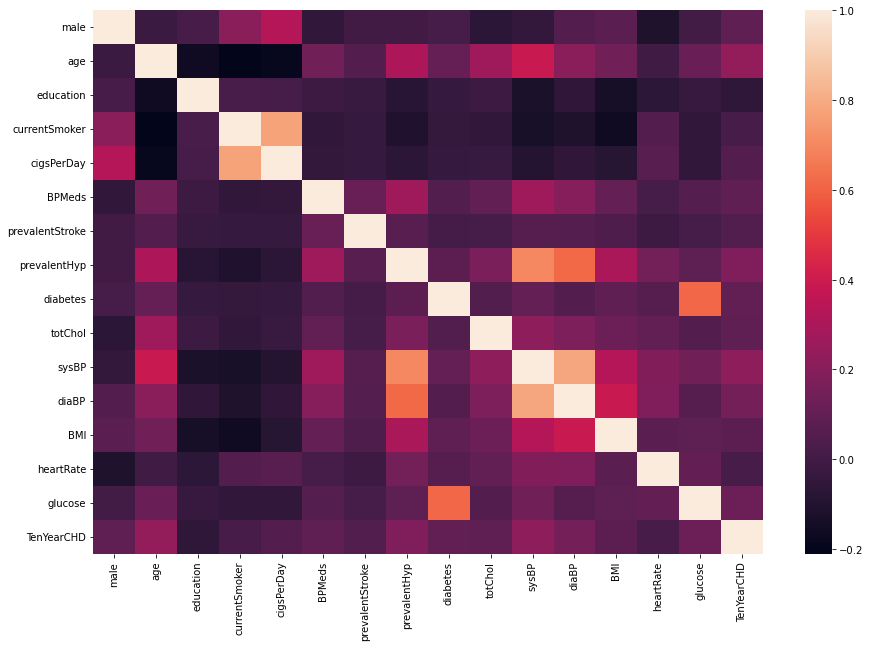

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr)
plt.show()

### Conclusions from Heatmap:

We are dropping the column education because a doctor would have to decide on which education level to put a patient and this could result in very subjective outcomes and it is also not very handy to put in practice.

The two features are not correlated to the outcome variable. In that case we would have kept them.

### Feature Selection

In [28]:
# Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = df.iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]    #target column 

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

              Specs       Score
10            sysBP  669.136021
1               age  296.200344
9           totChol  250.490205
4        cigsPerDay  155.798307
11            diaBP  142.521814
7      prevalentHyp   82.845455
8          diabetes   31.067621
5            BPMeds   28.191569
0              male   17.107751
12              BMI   15.785436
6   prevalentStroke    8.507833


In [29]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
10,sysBP,669.136021
1,age,296.200344
9,totChol,250.490205
4,cigsPerDay,155.798307
11,diaBP,142.521814
7,prevalentHyp,82.845455
8,diabetes,31.067621
5,BPMeds,28.191569
0,male,17.107751
12,BMI,15.785436


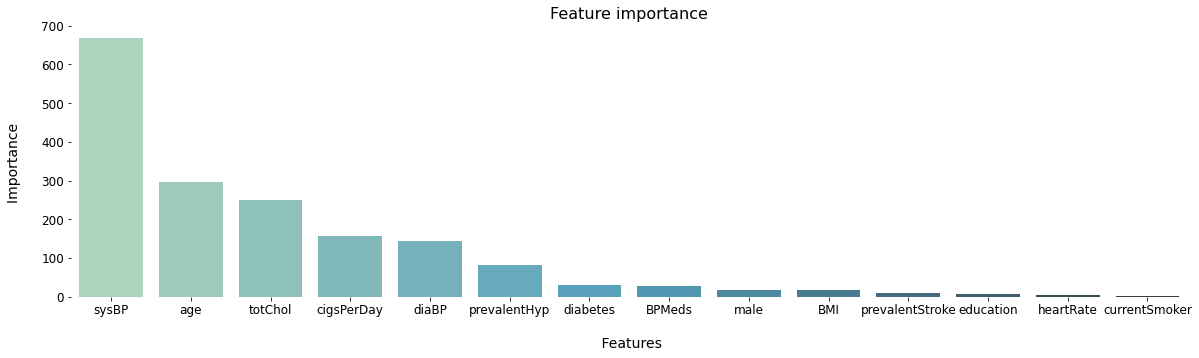

In [30]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [31]:
# selecting the 10 most impactful features for the target variable
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male',
 'BMI']

We will only keep those features that have the strongest relationship with the output variable. These features are:

- Systolic Blood Pressure
- Glucose
- Age
- Cholesterin
- Cigarettes per Day
- Diastolic Blood Pressure
- Hypertensive
- Diabetes
- Blood Pressure Medication
- Gender

In [32]:
# Create new dataframe with selected features

df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0


<AxesSubplot:>

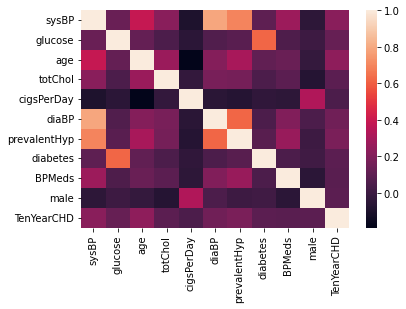

In [33]:
# Checking correlation again
df_corr = df.corr()
sns.heatmap(df_corr)

### Checking for outliers

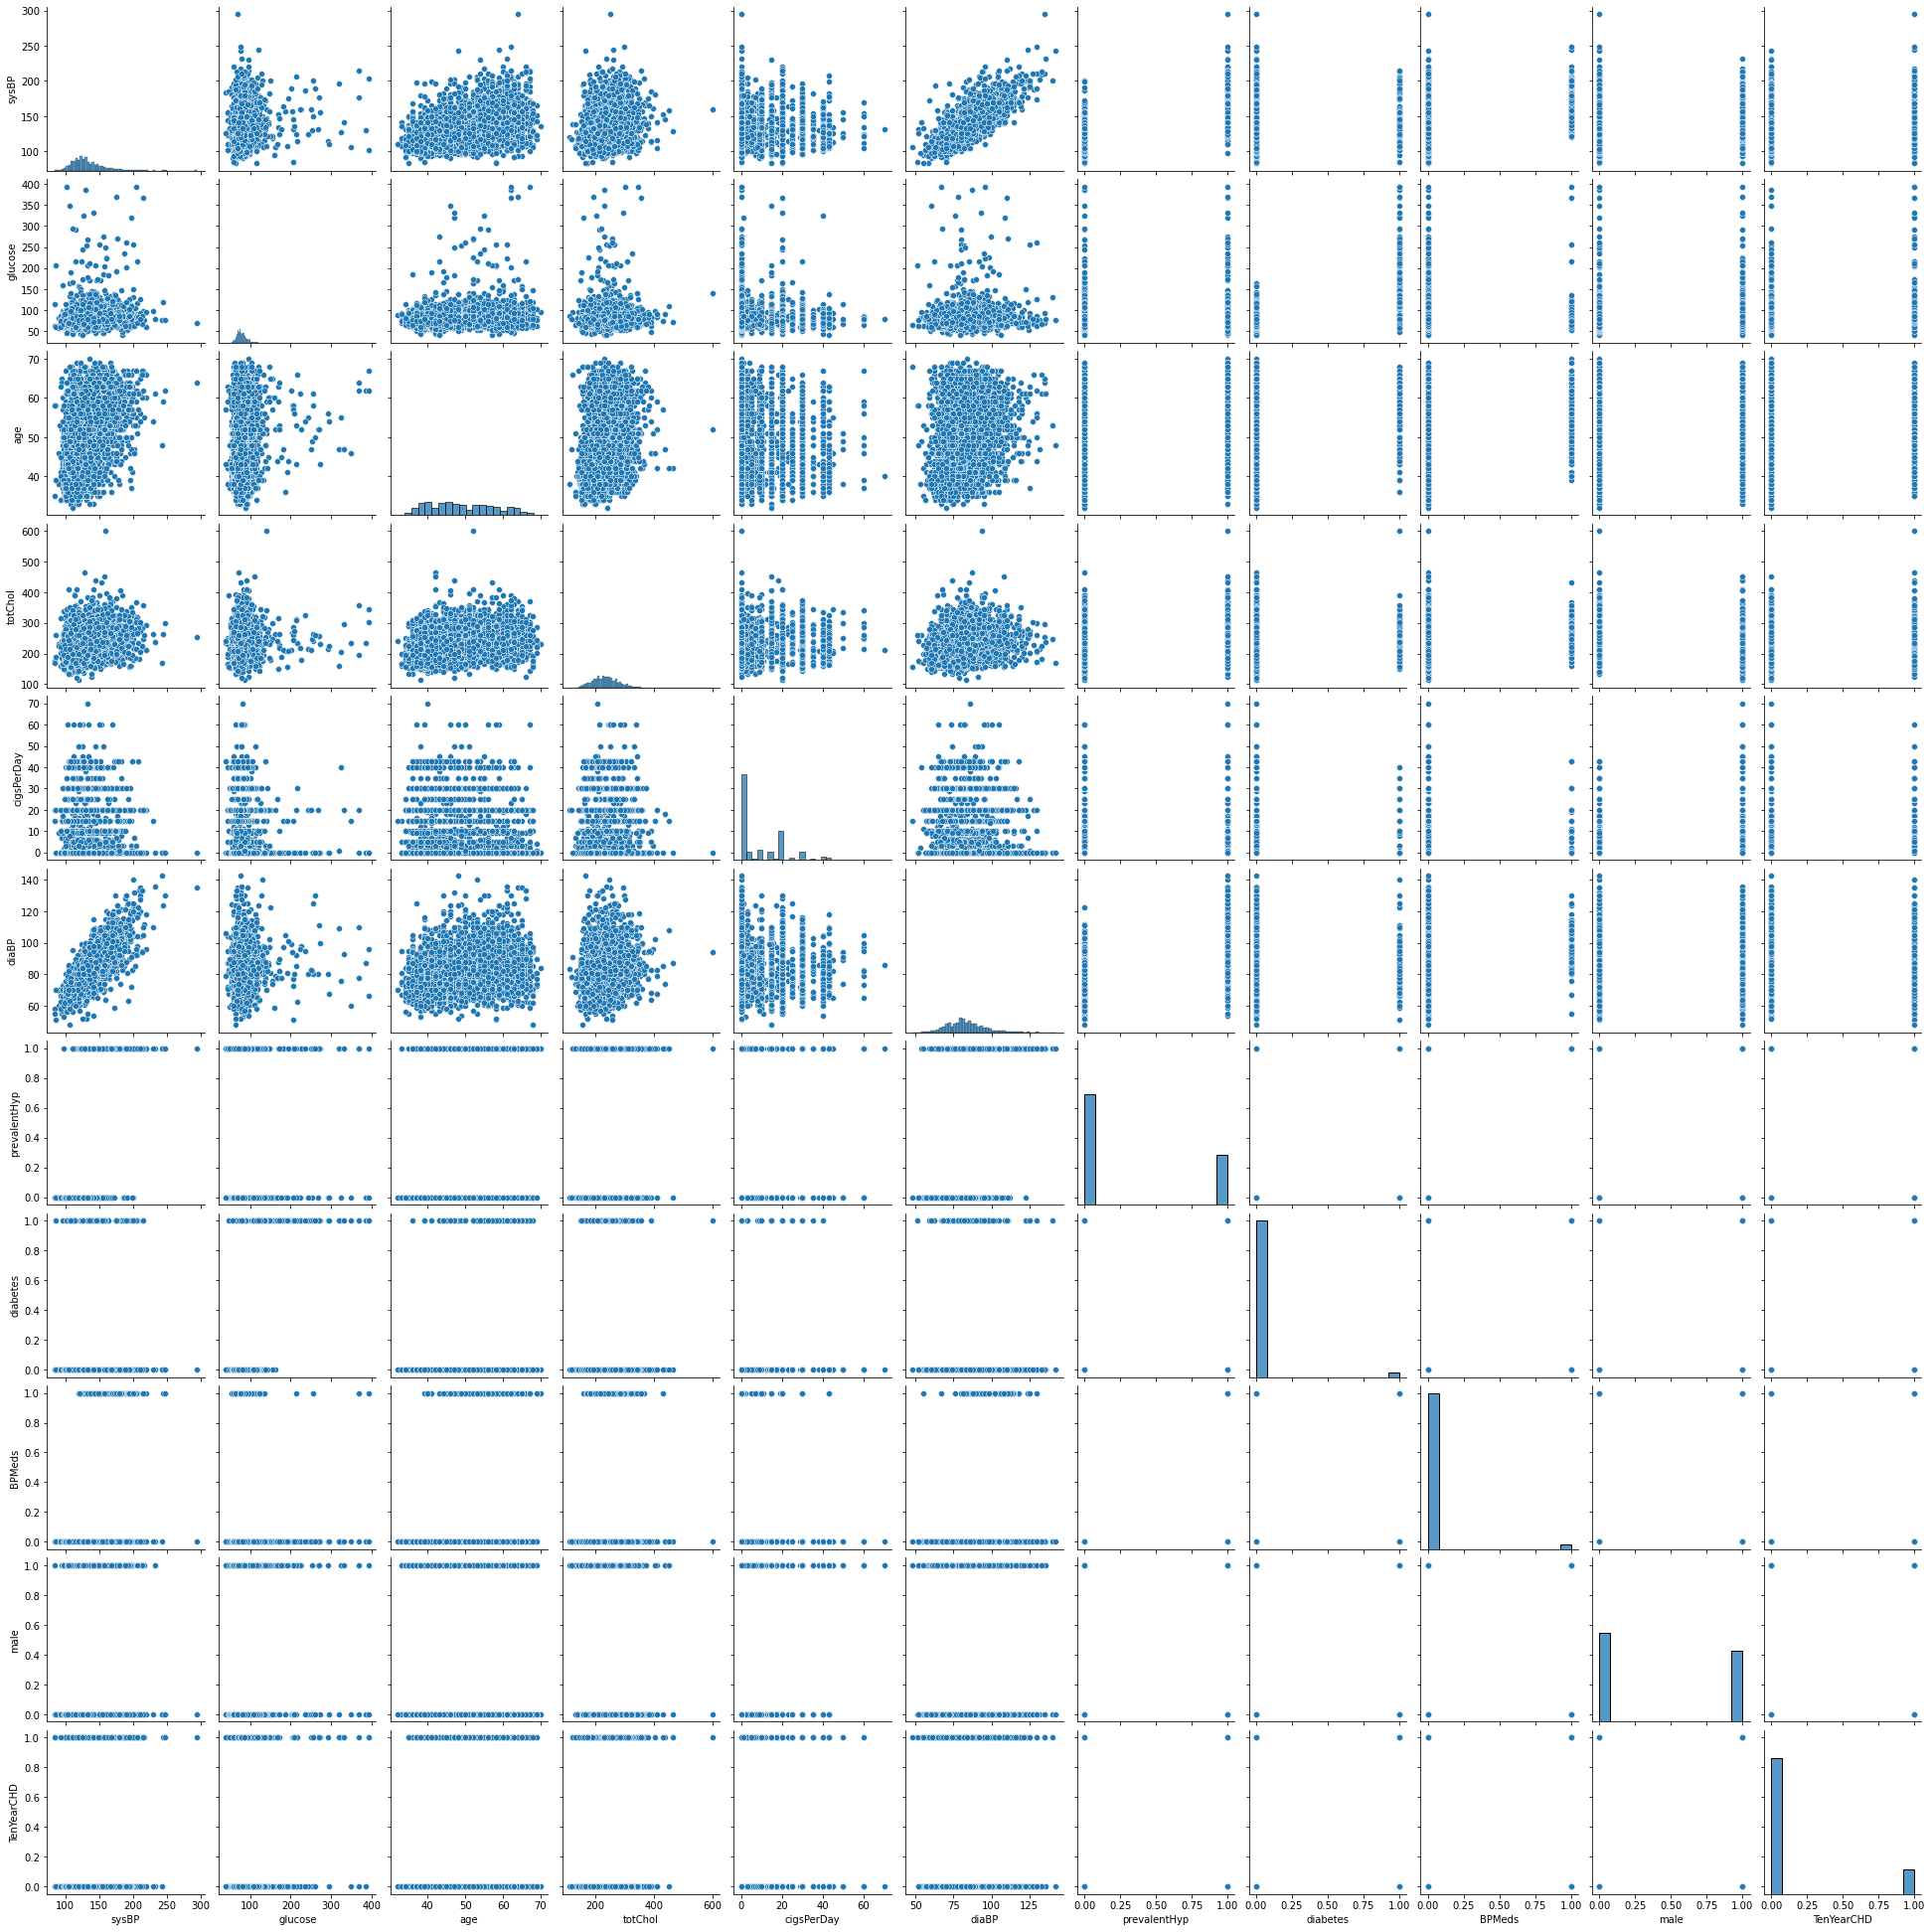

In [34]:
df.describe()
sns.pairplot(df)

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
1111,159.5,140.0,52,600.0,0.0,94.0,1,1,0.0,0,1


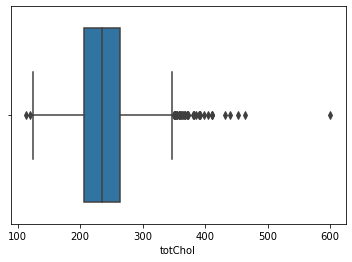

In [35]:
# Zooming into cholesterin outliers

sns.boxplot(df.totChol)
outliers = df[(df['totChol'] > 500)] 
outliers

### Dropping 2 outliers in cholesterin

<AxesSubplot:xlabel='totChol'>

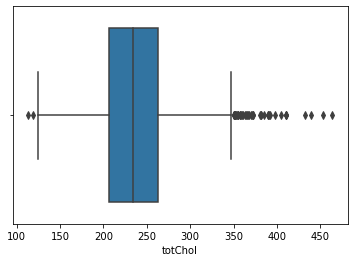

In [36]:
df = df.drop(df[df.totChol > 599].index)
sns.boxplot(df.totChol)

### Feature Scaling 

Since we want to try out different models, and also these that use distance as a measure, we will scale our features.

In [37]:
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [38]:
df_scaled.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000
mean,0.231031,0.118184,0.461876,0.352560,0.128970,0.369460,0.311457,0.026798,0.030353,0.443806,0.152037
std,0.104422,0.067480,0.225345,0.124481,0.170318,0.126714,0.463153,0.161514,0.171579,0.496900,0.359106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158392,0.087571,0.263158,0.264957,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.210402,0.107345,0.447368,0.344729,0.000000,0.359788,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.283688,0.132768,0.631579,0.427350,0.285714,0.444444,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
df.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000
mean,132.363139,81.837025,49.551272,236.748428,9.027892,82.914001,0.311457,0.026798,0.030353,0.443806,0.152037
std,22.085328,23.888078,8.563105,43.692739,11.922286,11.974492,0.463153,0.161514,0.171579,0.496900,0.359106
min,83.500000,40.000000,32.000000,113.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.000000,71.000000,42.000000,206.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,128.000000,78.000000,49.000000,234.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,143.500000,87.000000,56.000000,263.000000,20.000000,90.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,295.000000,394.000000,70.000000,464.000000,70.000000,142.500000,1.000000,1.000000,1.000000,1.000000,1.000000


##  Test - Train Split

In [40]:
# Taking y as "TenYearCHD" 
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [41]:
len(X_train)

2925

In [42]:
len(X_test)

732

## Resampling imbalanced Dataset 

In [43]:
# Checking balance of outcome variable
target_count = df_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 3101
Class 1: 556
Proportion: 5.58 : 1


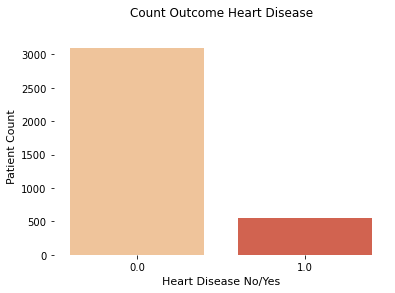

In [44]:
sns.countplot(df_scaled.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

We can see that the proportion is 5.57:1 which is not well balanced. One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory

## UNDERSAMPLING METHOD

Undersampling aims to decrease the number of instances from the overrepresented class in the data set. In our case, these techniques will decrease the number of fraudulent transactions in our data to approximately 50:50. If we do not balance the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like your algorithm is achieving superb results when, in reality, it is simply always predicting the majority class.

The easiest way to do so is to randomly select observations from the majority class and remove them from the data set until we achieve a balance between the majority and minority class.

In [45]:
# Shuffle df
shuffled_df = df_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()



0.0    611
1.0    556
Name: TenYearCHD, dtype: int64

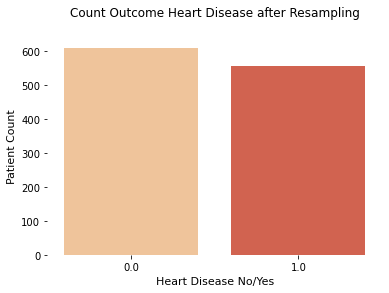

In [46]:
# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

### Model Pipeline

In [47]:
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)



classifiers = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(2)]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))

The accuracy score of LogisticRegression() is: 68.03%
The accuracy score of SVC() is: 66.12%
The accuracy score of DecisionTreeClassifier() is: 72.40%
The accuracy score of KNeighborsClassifier(n_neighbors=2) is: 80.05%


## Modelling & Evaluation (without Pipeline) 

### 1.LOGISTIC REGRESSION

In [48]:
# logistic regression again with the balanced dataset

normalized_df_reg = LogisticRegression().fit(X_train, y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 68.0%
The f1 score for LogReg is: 42.4%
The precision score for LogReg is: 31.3%
The recall score for LogReg is: 65.60000000000001%


## plotting confusion matrix LogReg

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

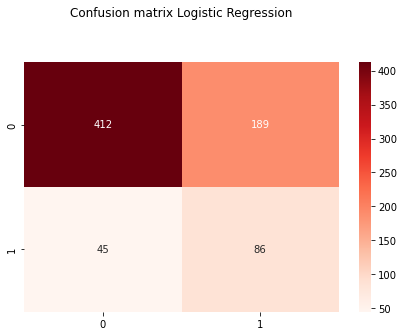

In [49]:


cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

## 2.SUPPORT VECTOR MACHINE (SVM)

In [50]:
# Support Vector Machine

#initialize model
svm = SVC()

#fit model
svm.fit(X_train, y_train)

normalized_df_svm_pred = svm.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_svm_pred)
print(f"The precision score for SVM is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_svm_pred)
print(f"The recall score for SVM is: {round(recall,3)*100}%")

The accuracy score for SVM is: 66.10000000000001%
The f1 score for SVM is: 41.199999999999996%
The precision score for SVM is: 29.9%
The recall score for SVM is: 66.4%


## plotting confusion matrix SVM

Text(0.5, 1.1, 'Confusion matrix SVM\n')

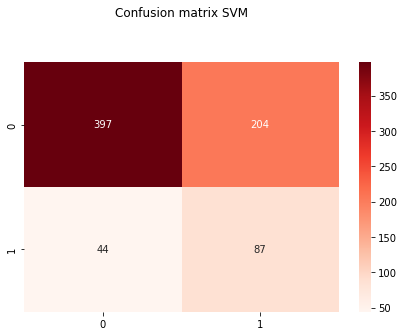

In [51]:

cnf_matrix_svm = confusion_matrix(y_test, normalized_df_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

## 3.DECISION TREE

In [52]:
# Decision Tree

#initialize model
dtc_up = DecisionTreeClassifier()

# fit model
dtc_up.fit(X_train, y_train)

normalized_df_dtc_pred = dtc_up.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_dtc_pred)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_dtc_pred)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_dtc_pred)
print(f"The recall score for DTC is: {round(recall,3)*100}%")

The accuracy score for DTC is: 73.1%
The f1 score for DTC is: 57.099999999999994%
The precision score for DTC is: 39.900000000000006%
The recall score for DTC is: 100.0%


##  plotting confusion matrix Decision Tree

Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

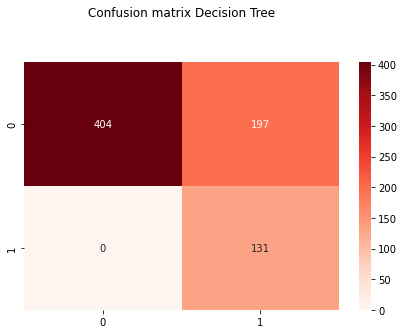

In [53]:

cnf_matrix_dtc = confusion_matrix(y_test, normalized_df_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)

## 4.K-Nearest Neighbor(KNN)

In [54]:
# KNN Model

#initialize model
knn = KNeighborsClassifier(n_neighbors = 2)

#fit model
knn.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_knn_pred = knn.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

The accuracy score for KNN is: 80.10000000000001%
The f1 score for KNN is: 50.3%
The precision score for KNN is: 45.4%
The recall score for KNN is: 56.49999999999999%


## Result: The KNN model has the highest accuracy score

In [55]:
# Check overfit of the KNN model
# accuracy test and train
acc_test = knn.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = knn.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")

The accuracy score of the test data is:  80.05464480874316 %
The accuracy score of the training data is:  79.69 %


#### The scores for test and training data for the KNN model are similar. Therefore we do not expect the model to overfit.

In [56]:
# Perform cross validation
'''Cross Validation is used to assess the predictive performance of the models and and to judge 
how they perform outside the sample to a new data set'''

cv_results = cross_val_score(knn, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

Cross-validated scores: [0.84153005 0.83606557 0.84131327 0.84268126 0.83036936]
The Accuracy of Model with Cross Validation is: 83.84%


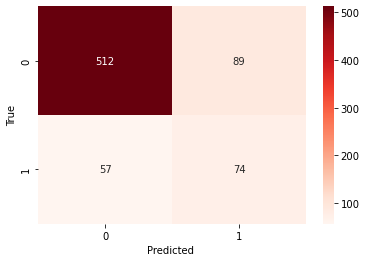

In [57]:
# plotting confusion matrix KNN

cnf_matrix_knn = confusion_matrix(y_test, normalized_df_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True');

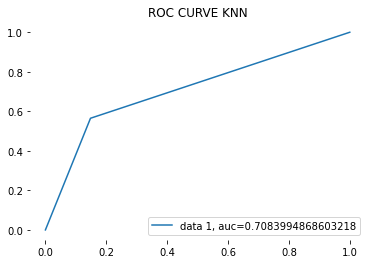

The score for the AUC ROC Curve is: 70.8%


In [58]:
# AU ROC CURVE KNN
'''the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate 
and calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to 
distinguish between the two outcome classes.'''

fpr, tpr, _ = roc_curve(y_test, normalized_df_knn_pred)
auc = roc_auc_score(y_test, normalized_df_knn_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE KNN')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")

## Applying the model

In [60]:
def start_questionnaire():
    my_predictors = []
    parameters=['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male']
    
    print('Input Patient Information:')
    
    age = input("Patient's age: >>> ") 
    my_predictors.append(age)
    male = input("Patient's gender. male=1, female=0: >>> ") 
    my_predictors.append(male)
    cigsPerDay = input("Patient's smoked cigarettes per day: >>> ") 
    my_predictors.append(cigsPerDay)
    sysBP = input("Patient's systolic blood pressure: >>> ") 
    my_predictors.append(sysBP)
    diaBP = input("Patient's diastolic blood pressure: >>> ")
    my_predictors.append(diaBP)
    totChol = input("Patient's cholesterin level: >>> ") 
    my_predictors.append(totChol)
    prevalentHyp = input("Was Patient hypertensive? Yes=1, No=0 >>> ") 
    my_predictors.append(prevalentHyp)
    diabetes = input("Did Patient have diabetes? Yes=1, No=0 >>> ") 
    my_predictors.append(diabetes)
    glucose = input("What is the Patient's glucose level? >>> ") 
    my_predictors.append(diabetes)
    BPMeds = input("Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> ")
    my_predictors.append(BPMeds)
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    scaler = MinMaxScaler(feature_range=(0,1)) 
   
    # assign scaler to column:
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    my_y_pred = knn.predict(my_df)
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient will develop a Heart Disease.")
    if my_y_pred == 0:
        print("The patient will not develop a Heart Disease.")
        
start_questionnaire()

Input Patient Information:
Patient's age: >>> 22
Patient's gender. male=1, female=0: >>> 1
Patient's smoked cigarettes per day: >>> 10
Patient's systolic blood pressure: >>> 130
Patient's diastolic blood pressure: >>> 100
Patient's cholesterin level: >>> 220
Was Patient hypertensive? Yes=1, No=0 >>> 0
Did Patient have diabetes? Yes=1, No=0 >>> 0
What is the Patient's glucose level? >>> 90
Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> 0


Result:
The patient will develop a Heart Disease.


# Conclusion

To Predict the Heart Disease in the next upcoming ten years. K-Nearest Neighbour has high accuracy to predict. The cause of Heart disease mainly smoking cigarettes and abnormal in blood pressure. In conclusion, the use of ML-based Heart Disease prediction models has the potential to save lives, reduce healthcare costs, and improve the quality of life for Heart patients. However, further research is necessary to improve the accuracy and generalizability of these models and to ensure that they do not perpetuate existing biases and inequalities. Overall, the development of ML-based stroke prediction models is an exciting area of research with significant potential for improving Heart Disease prevention, diagnosis, and treatment.